### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

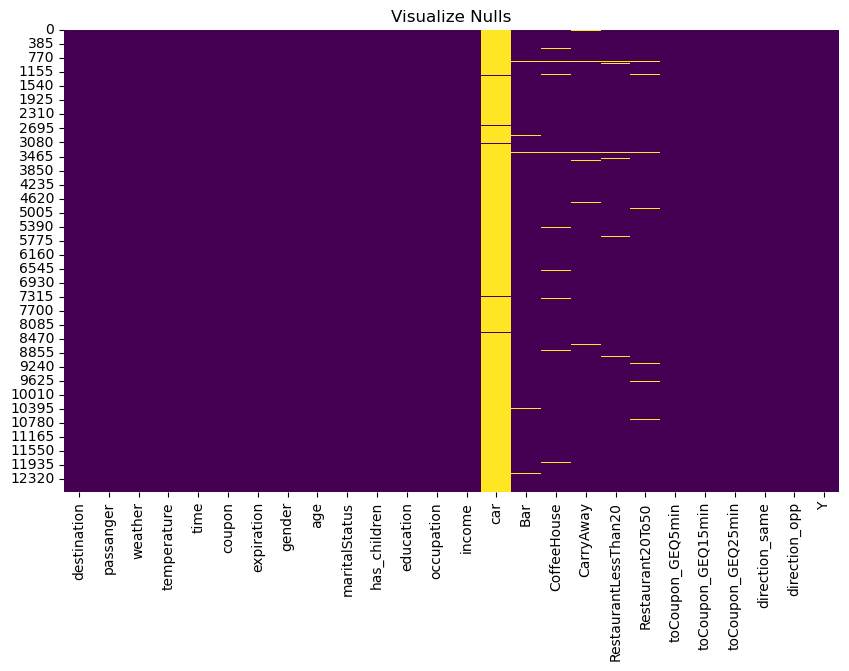

In [9]:
print(data.info())
print(data.describe())
#check for nulls or missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])
#check for duplicates
duplicates = data.duplicated().sum()
print(f'Duplicate rows: {duplicates}')
#look at the datatypes, check for unique values
print(data.dtypes)
for col in data.select_dtypes(include=['object']).columns:
    print(f'Unique values in {col}: {data[col].unique()}')
#visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Visualize Nulls')
plt.show()


3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
data_cleaned = data.drop(columns=['car'])

4. What proportion of the total observations chose to accept the coupon?



In [13]:
total_population = data_cleaned.shape[0]
count_yes = data_cleaned['Y'].sum()
accepted = count_yes / total_population
print(accepted)


0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

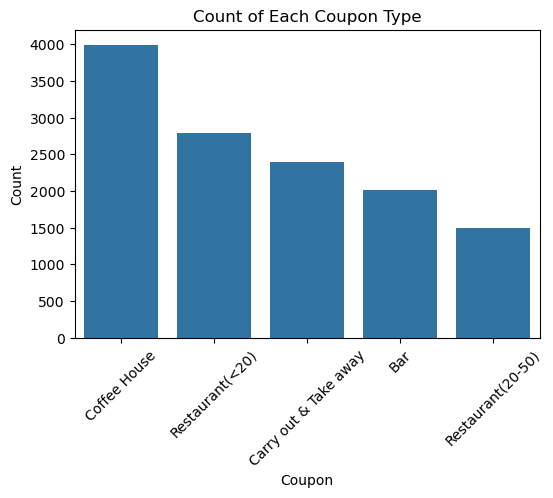

In [15]:
coupon_counts = data_cleaned['coupon'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Count of Each Coupon Type')
plt.xticks(rotation=45)
plt.show()


6. Use a histogram to visualize the temperature column.

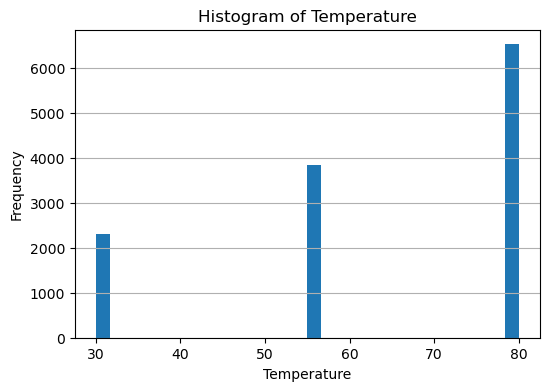

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(data_cleaned['temperature'], bins=30)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.grid(axis='y')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
bar_df = data[data['coupon'] == 'Bar']
bar_df.head()
bar_df.shape[0]

2017

2. What proportion of bar coupons were accepted?


In [21]:
total_bar_population = bar_df.shape[0]
count_bar_yes = bar_df['Y'].sum()
bar_accepted = count_bar_yes / total_bar_population
print(bar_accepted)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
#print(bar_df.shape[0]) #check dataframe shape to see if we inadvertently changed it
bar_coupon_df = bar_df[bar_df['Bar'].notna() & (bar_df['Bar'] != '')]
lessthan_equalto_3 = bar_coupon_df[bar_coupon_df['Bar'].isin(['1~3', 'less1', 'never'])]
greaterthan_3 = bar_coupon_df[bar_coupon_df['Bar'].isin(['4~8', 'gt8'])]

acceptance_rate_lessthan_equalto_3 = lessthan_equalto_3['Y'].mean()
acceptance_rate_greaterthan_3 = greaterthan_3['Y'].mean()
print(f'Acceptance Rate - 3 or fewer times: {acceptance_rate_lessthan_equalto_3 * 100:.2f}%')
print(f'Acceptance Rate - more than 3 times: {acceptance_rate_greaterthan_3 * 100:.2f}%')

Acceptance Rate - 3 or fewer times: 37.06%
Acceptance Rate - more than 3 times: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
#print(bar_df.shape[0]) #check dataframe shape to see if we inadvertently changed it
bar_df.loc[:, 'age'] = pd.to_numeric(bar_df['age'], errors='coerce')
bar_coupon_df = bar_df[bar_df['age'].notna()]

# Bar visitors > once a month and age > 25
group_1 = bar_coupon_df[(bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon_df['age'] > 25)]
# All others NOT in the group above ...the tilde is a "not" operator in Python in case anyone is wondering
group_2 = bar_coupon_df[~((bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon_df['age'] > 25))]

acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()
print(f'Acceptance Rate - drivers > 25 who go to a bar > once: {acceptance_rate_group_1 * 100:.2f}%')
print(f'Acceptance Rate - all other drivers: {acceptance_rate_group_2 * 100:.2f}%')

Acceptance Rate - drivers > 25 who go to a bar > once: 69.97%
Acceptance Rate - all other drivers: 35.55%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [27]:
#print(bar_df.shape[0]) #check dataframe shape to see if we inadvertently changed it
bar_coupon_df_2 = bar_df[bar_df['occupation'].notna()]
bar_coupon_df_2.loc[:, 'age'] = pd.to_numeric(bar_coupon_df_2['age'], errors='coerce')
bar_coupon_df_2 = bar_coupon_df_2[bar_coupon_df_2['age'].notna()]

group_1 = bar_coupon_df_2[
    (bar_coupon_df_2['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # More than once a month
    ~(bar_coupon_df_2['passanger'].isin(['Alone', 'Kid(s)'])) &  # Not Alone and not transporting kids
    (~bar_coupon_df_2['occupation'].str.contains('Farming Fishing & Forestry', na=False)) 
]

#all others...using the tilde for "not"
group_2 = bar_coupon_df_2[~((bar_coupon_df_2['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                          ~(bar_coupon_df_2['passanger'].isin(['Alone', 'Kid(s)'])) & 
                          (~bar_coupon_df_2['occupation'].str.contains('Farming Fishing & Forestry', na=False)))]

acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()
print(f'Acceptance Rate - drivers who go to bars more than once per month with a passenger, but no kids: {acceptance_rate_group_1 * 100:.2f}%')
print(f'Acceptance Rate - all other drivers: {acceptance_rate_group_2 * 100:.2f}%')

Acceptance Rate - drivers who go to bars more than once per month with a passenger, but no kids: 72.99%
Acceptance Rate - all other drivers: 39.38%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [29]:
#Filter out null or blank values in the columns that we're using
#print(bar_df.shape[0]) #check dataframe shape to see if we inadvertently changed it
bar_coupon_df_3 = bar_df[bar_df['Bar'].notna() & (bar_df['Bar'] != '')]
bar_coupon_df_3 = bar_coupon_df_3[bar_coupon_df_3['occupation'].notna()]
bar_coupon_df_3 = bar_coupon_df_3[bar_coupon_df_3['maritalStatus'].notna()]
bar_coupon_df_3.loc[:, 'age'] = pd.to_numeric(bar_coupon_df_3['age'], errors='coerce')
bar_coupon_df_3 = bar_coupon_df_3[bar_coupon_df_3['age'].notna()]

#go to bars more than once a month, had passengers that were not a kid, and were not widowed
not_widowed = bar_coupon_df_3[
    (bar_coupon_df_3['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupon_df_3['passanger'] != 'Kid(s)') &      # NOT transporting kids
    (bar_coupon_df_3['maritalStatus'] != 'Widowed')         # NOT widowed
]

#go to bars more than once a month and are under the age of 30
under_30 = bar_coupon_df_3[
    (bar_coupon_df_3['Bar'].isin(['1~3', '4~8', 'gt8'])) &  
    (bar_coupon_df_3['age'] < 30) 
]

#go to cheap restaurants more than 4 times a month and income is less than 50K
cheap_restaurants = bar_coupon_df_3[
    (bar_coupon_df_3['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &  
    (bar_coupon_df_3['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]

#Total population
total_population = bar_coupon_df_3  # This is the entire DataFrame after filtering for nulls and NaNs

#Acceptance rates for each condition
not_widowed_rate = not_widowed['Y'].mean()
under_30_rate = under_30['Y'].mean()
cheap_restaurants_rate = cheap_restaurants['Y'].mean()
total_rate = total_population['Y'].mean()


print(f'Acceptance Rate - Not Widowed: {not_widowed_rate * 100:.2f}%')
print(f'Acceptance Rate - Under 30: {under_30_rate * 100:.2f}%')
print(f'Acceptance Rate - Cheap Restaurants: {cheap_restaurants_rate * 100:.2f}%')
print(f'Acceptance Rate - Total: {total_rate * 100:.2f}%')

Acceptance Rate - Not Widowed: 71.96%
Acceptance Rate - Under 30: 73.13%
Acceptance Rate - Cheap Restaurants: 48.44%
Acceptance Rate - Total: 43.00%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [31]:
#Drivers who accepted bar coupons were likely to be young, childless, go out relatively often, are social, and perhaps don't have to wake up very early in the morning (Farming occupation).
#My hypothesis is that most acceptances of coupons are from people who are not necessarily responsible for others yet in their lives, and have the time and 
#inclination to socialize due to their independence.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I'm investigating the Restaurant $20-50 range.  The number of acceptances was the lowest and I am interested to know what the demographics are for the population that accepts coupons for the more expensive option.

1. Repeating the first step from the "Bar" coupon evaluation, I want to understand what the overall acceptance rate is and do some basic data cleaning.  The only null column is car - it's not useful but it doesn't really harm the dataframe to leave it in place.

In [35]:
rest_df = data[data['coupon'] == 'Restaurant(20-50)']
rest_df.head()
rest_df.shape[0]
rest_df2 = rest_df.copy()

total_rest_population = rest_df.shape[0]
count_rest_yes = rest_df['Y'].sum()
restraunt_accepted = count_rest_yes / total_rest_population
print(restraunt_accepted)

0.4410187667560322


After copying the dataframe so that I can do some data validation on the initial filtered dataframe (rest_df), I need to replace the string values with an approximation that is separate enough to create a visual story to help explain the results:

In [37]:
frequency_mapping = {
    'never': 0,
    'less1': 0.5,   # Less than 1 visit
    '1~3': 2,       # Average of 1 to 3 visits
    '4~8': 6,       # Average of 4 to 8 visits
    'gt8': 10       # Assuming an average of more than 8 visits
}

# Apply mapping
for col in ['CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    rest_df2[col] = rest_df2[col].map(frequency_mapping)

Next I need to summarize the data to prepare for a heatmap and bar plot, so that the relationships are properly visualized.  I'll name the columns to make my life a bit easier:

In [39]:
summary = rest_df2.groupby(['income', 'Restaurant20To50'])['Y'].agg(['mean', 'count']).reset_index()
summary.columns = ['income', 'Restaurant20To50', 'acceptance_rate', 'total_count']

Next I'll create a bar plot to show the relationship between income level, acceptance rate of the coupon, and frequency of visits to the more expensive restaurant:

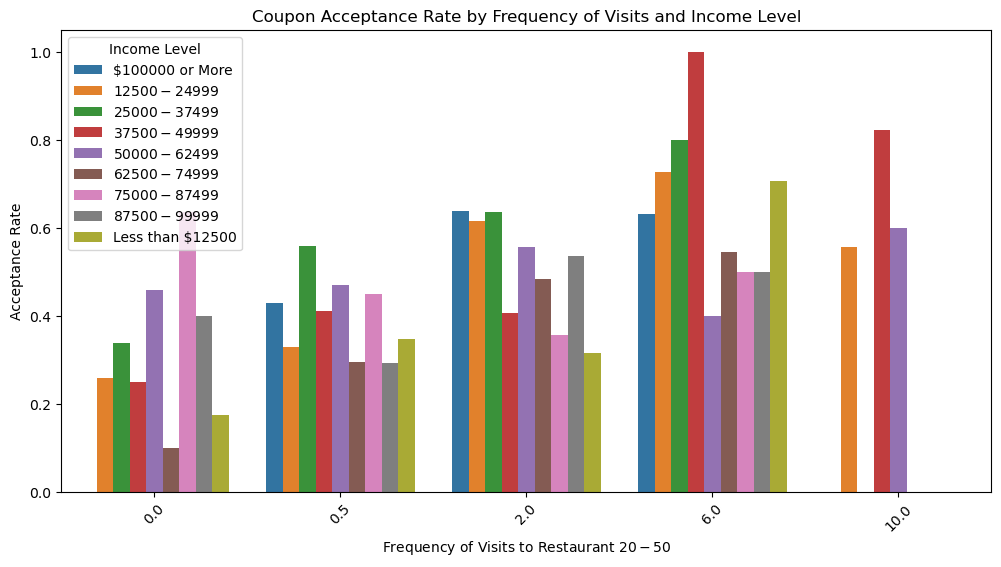

In [41]:
heatmap_data = summary.pivot(index="Restaurant20To50", columns="income", values="acceptance_rate")

# Bar plot for better visibility
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='Restaurant20To50', y='acceptance_rate', hue='income', errorbar=None)
plt.title('Coupon Acceptance Rate by Frequency of Visits and Income Level')
plt.ylabel('Acceptance Rate')
plt.xlabel('Frequency of Visits to Restaurant $20-$50')
plt.legend(title='Income Level', loc='upper left')
plt.xticks(rotation=45)
plt.show()

I'll also create a heatmap to help visualize the relationship a bit better:

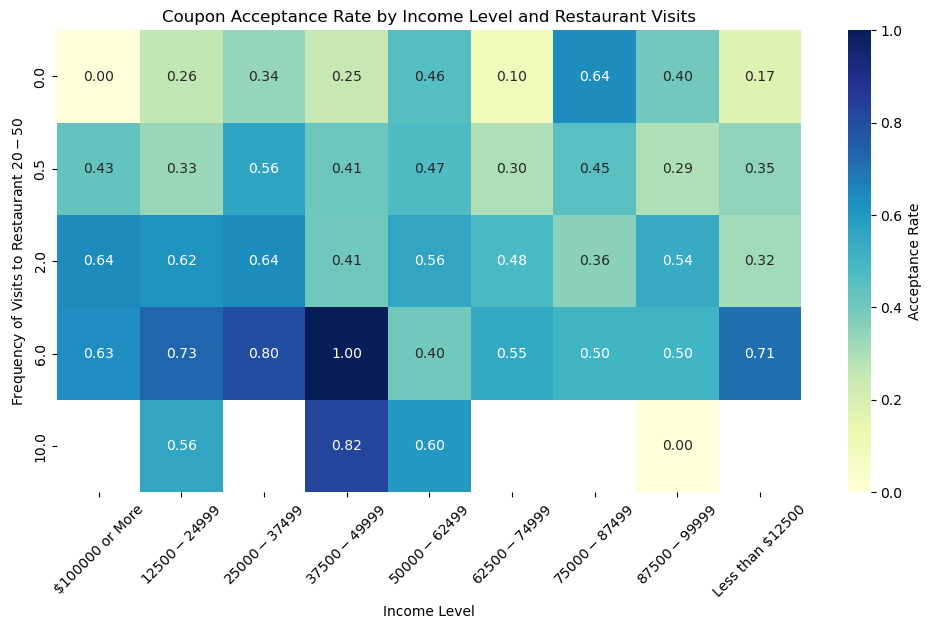

In [43]:
#fmt=".2f" is intended to show a float result helping to highlight the highest acceptance levels
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Acceptance Rate'})
plt.title('Coupon Acceptance Rate by Income Level and Restaurant Visits')
plt.xlabel('Income Level')
plt.ylabel('Frequency of Visits to Restaurant $20-$50')
plt.xticks(rotation=45)
plt.show()

2. I want to find out whether there's a significant difference between acceptance rates in populations that frequent restuarants and those that do not

In [45]:
rest_coupon_df = rest_df[rest_df['Restaurant20To50'].notna() & (rest_df['Restaurant20To50'] != '')]


lessthan_equalto_3 = rest_coupon_df[rest_coupon_df['Restaurant20To50'].isin(['1~3', 'less1', 'never'])]
greaterthan_3 = rest_coupon_df[rest_coupon_df['Restaurant20To50'].isin(['4~8', 'gt8'])]

acceptance_rate_lessthan_equalto_3 = lessthan_equalto_3['Y'].mean()
acceptance_rate_greaterthan_3 = greaterthan_3['Y'].mean()
print(f'Acceptance Rate - 3 or fewer times: {acceptance_rate_lessthan_equalto_3 * 100:.2f}%')
print(f'Acceptance Rate - more than 3 times: {acceptance_rate_greaterthan_3 * 100:.2f}%')

Acceptance Rate - 3 or fewer times: 42.46%
Acceptance Rate - more than 3 times: 64.23%


3. Next I want to know whether there are differences in acceptance rate based on Income Level and Frequency of visit:

In [47]:

lt50_gt4 = rest_coupon_df[
    (rest_coupon_df['Restaurant20To50'].isin(['4~8', 'gt8'])) &  
    (rest_coupon_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]

lt50_lt4 = rest_coupon_df[
    (rest_coupon_df['Restaurant20To50'].isin(['1~3', 'less1', 'never'])) &  
    (rest_coupon_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]


gt50_gt4 = rest_coupon_df[
    (rest_coupon_df['Restaurant20To50'].isin(['4~8', 'gt8'])) &  
    (rest_coupon_df['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999','$100000 or More']))
]

gt50_lt4 = rest_coupon_df[
    (rest_coupon_df['Restaurant20To50'].isin(['1~3', 'less1', 'never'])) &  
    (rest_coupon_df['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999','$100000 or More']))
]

lt50_gt4_rate = lt50_gt4['Y'].mean()
lt50_lt4_rate = lt50_lt4['Y'].mean()
gt50_gt4_rate = gt50_gt4['Y'].mean()
gt50_lt4_rate = gt50_lt4['Y'].mean()

print(f'Acceptance Rate - Less than $50k/yr, Greater than 4 visits: {lt50_gt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Less than $50k/yr, Less than 4 visits: {lt50_lt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Greater than $50k/yr, Greater than 4 visits: {gt50_gt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Greater than $50k/yr, Less than 4 visits: {gt50_lt4_rate * 100:.2f}%')


Acceptance Rate - Less than $50k/yr, Greater than 4 visits: 74.60%
Acceptance Rate - Less than $50k/yr, Less than 4 visits: 40.58%
Acceptance Rate - Greater than $50k/yr, Greater than 4 visits: 53.33%
Acceptance Rate - Greater than $50k/yr, Less than 4 visits: 44.44%


4. I want to know if the acceptance rate is impacted by whether the person is single or not

In [49]:
#print(rest_coupon_df.head())
rest_coupon_df = rest_df[rest_df['Restaurant20To50'].notna() & (rest_df['Restaurant20To50'] != '')]

single_gt4 = rest_coupon_df[
    (rest_coupon_df['Restaurant20To50'].isin(['4~8', 'gt8'])) &  
    (rest_coupon_df['maritalStatus'].isin(['Single', 'Divorced']))
]

single_lt4 = rest_coupon_df[
    (rest_coupon_df['Restaurant20To50'].isin(['1~3', 'less1', 'never'])) &  
    (rest_coupon_df['maritalStatus'].isin(['Single', 'Divorced']))
]


together_gt4 = rest_coupon_df[
    (rest_coupon_df['Restaurant20To50'].isin(['4~8', 'gt8'])) &  
    (rest_coupon_df['maritalStatus'].isin(['Married partner', 'Unmarried partner']))
]

together_lt4 = rest_coupon_df[
    (rest_coupon_df['Restaurant20To50'].isin(['1~3', 'less1', 'never'])) &  
    (rest_coupon_df['maritalStatus'].isin(['Married partner', 'Unmarried partner']))
]

single_gt4_rate = single_gt4['Y'].mean()
single_lt4_rate = single_lt4['Y'].mean()
together_gt4_rate = together_gt4['Y'].mean()
together_lt4_rate = together_lt4['Y'].mean()

print(f'Acceptance Rate - Single, Greater than 4 visits: {single_gt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Single, Less than 4 visits: {single_lt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Together, Greater than 4 visits: {together_gt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Together, Less than 4 visits: {together_lt4_rate * 100:.2f}%')

Acceptance Rate - Single, Greater than 4 visits: 67.53%
Acceptance Rate - Single, Less than 4 visits: 42.49%
Acceptance Rate - Together, Greater than 4 visits: 58.70%
Acceptance Rate - Together, Less than 4 visits: 42.82%


5. Now I'm curious if the cost of the restaurant makes a difference in these acceptance rates, so I'll do the same analysis for the cheaper restaurant

In [51]:
rest_coupon_df2 = rest_df[rest_df['RestaurantLessThan20'].notna() & (rest_df['RestaurantLessThan20'] != '')]

lt50_gt4 = rest_coupon_df2[
    (rest_coupon_df2['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &  
    (rest_coupon_df2['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]

lt50_lt4 = rest_coupon_df2[
    (rest_coupon_df2['RestaurantLessThan20'].isin(['1~3', 'less1', 'never'])) &  
    (rest_coupon_df2['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]


gt50_gt4 = rest_coupon_df2[
    (rest_coupon_df2['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &  
    (rest_coupon_df2['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999','$100000 or More']))
]

gt50_lt4 = rest_coupon_df2[
    (rest_coupon_df2['RestaurantLessThan20'].isin(['1~3', 'less1', 'never'])) &  
    (rest_coupon_df2['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999','$100000 or More']))
]

lt50_gt4_rate = lt50_gt4['Y'].mean()
lt50_lt4_rate = lt50_lt4['Y'].mean()
gt50_gt4_rate = gt50_gt4['Y'].mean()
gt50_lt4_rate = gt50_lt4['Y'].mean()

print(f'Acceptance Rate - Less than $50k/yr, Greater than 4 visits: {lt50_gt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Less than $50k/yr, Less than 4 visits: {lt50_lt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Greater than $50k/yr, Greater than 4 visits: {gt50_gt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Greater than $50k/yr, Less than 4 visits: {gt50_lt4_rate * 100:.2f}%')

Acceptance Rate - Less than $50k/yr, Greater than 4 visits: 47.15%
Acceptance Rate - Less than $50k/yr, Less than 4 visits: 40.64%
Acceptance Rate - Greater than $50k/yr, Greater than 4 visits: 49.12%
Acceptance Rate - Greater than $50k/yr, Less than 4 visits: 42.07%


In [52]:


single_gt4 = rest_coupon_df2[
    (rest_coupon_df2['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &  
    (rest_coupon_df2['maritalStatus'].isin(['Single', 'Divorced']))
]

single_lt4 = rest_coupon_df2[
    (rest_coupon_df2['RestaurantLessThan20'].isin(['1~3', 'less1', 'never'])) &  
    (rest_coupon_df2['maritalStatus'].isin(['Single', 'Divorced']))
]


together_gt4 = rest_coupon_df2[
    (rest_coupon_df2['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &  
    (rest_coupon_df2['maritalStatus'].isin(['Married partner', 'Unmarried partner']))
]

together_lt4 = rest_coupon_df2[
    (rest_coupon_df2['RestaurantLessThan20'].isin(['1~3', 'less1', 'never'])) &  
    (rest_coupon_df2['maritalStatus'].isin(['Married partner', 'Unmarried partner']))
]

single_gt4_rate = single_gt4['Y'].mean()
single_lt4_rate = single_lt4['Y'].mean()
together_gt4_rate = together_gt4['Y'].mean()
together_lt4_rate = together_lt4['Y'].mean()

print(f'Acceptance Rate - Single, Greater than 4 visits: {single_gt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Single, Less than 4 visits: {single_lt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Together, Greater than 4 visits: {together_gt4_rate * 100:.2f}%')
print(f'Acceptance Rate - Together, Less than 4 visits: {together_lt4_rate * 100:.2f}%')

Acceptance Rate - Single, Greater than 4 visits: 48.71%
Acceptance Rate - Single, Less than 4 visits: 43.32%
Acceptance Rate - Together, Greater than 4 visits: 47.59%
Acceptance Rate - Together, Less than 4 visits: 40.54%


6.  It appears that there is a statistically significant acceptance rate difference that seems largely due to the cost of the restaurant rather than major differences in demographics.  Respondents making less than $50k seem more likely to accept a coupon if they already frequently dine out, and are more likely to do so if they're single, but only slightly.  Frequency of dining out seems to be a larger factor than income and marital status.

A bit of an anomaly:

100% (4) of the population with income between $37500 - $49999 who had between 4-8 visits to the Restaurant20To50 accepted the coupon.  The sample set for that demographic was relatively low.  When factoring in the gt8 as well, the number of respondents is 18 of 21.  That's an 85% acceptance rate for this population.  

If I were intending to drive business to the more expensive restaurants, I'd offer coupons to frequent customers regardless of income level or marital status, but targeting an income group ~$50,000 seems to be a sweet spot.